# Exercise: Chicago Food Deserts

#### Summary

Looking at census tracts in Chicago to find food deserts - places without a good source of food.

#### Data Source(s)

All data from the city of Chicago

#### Files

- `Boundaries - Census Tracts - 2010.zip`, census tracts in Chicago from [here](https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Census-Tracts-2010/5jrd-6zik)
- `Grocery_Stores_-_2013.csv`, grocery stores in Chicago from [here](https://data.cityofchicago.org/Community-Economic-Development/Grocery-Stores-2013/53t8-wyrc)

#### Data dictionary

Visit the "here" links above. Scroll down a little and click 'Show All' to see every column.

#### Skills

- Opening shapefiles
- Opening CSV files as geography
- Reprojecting
- Buffers

## Import what you'll need to do geographic work

Probably pandas, geopandas, and the shapely thing that lets you make Points

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

%matplotlib inline

## Read in the census tract boundaries for Chicago

Give it a name that makes sense, like `tracts`.

In [4]:
tracts = districts = gpd.read_file("Boundaries - Census Tracts - 2010/geo_export_085dcd7b-113c-4a6d-8d43-5926de1dcc5b.shp")

### Confirm that you have 10 columns and 801 rows

In [5]:
tracts.shape

(801, 10)

### What does the data look like? What columns do you have?

In [30]:
tracts.dtypes

commarea       object
commarea_n    float64
countyfp10     object
geoid10        object
geometry       object
name10         object
namelsad10     object
notes          object
statefp10      object
tractce10      object
dtype: object

In [6]:
tracts

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,tractce10
0,44,44.0,031,17031842400,POLYGON ((-87.62404799998049 41.73021699998396...,8424,Census Tract 8424,,17,842400
1,59,59.0,031,17031840300,"POLYGON ((-87.6860799999848 41.82295600001154,...",8403,Census Tract 8403,,17,840300
2,34,34.0,031,17031841100,"POLYGON ((-87.62934700001182 41.8527970000265,...",8411,Census Tract 8411,,17,841100
3,31,31.0,031,17031841200,POLYGON ((-87.68813499997718 41.85569099999095...,8412,Census Tract 8412,,17,841200
4,28,28.0,031,17031838200,"POLYGON ((-87.66781999997529 41.8741839999791,...",8382,Census Tract 8382,,17,838200
5,65,65.0,031,17031650301,POLYGON ((-87.73706400002477 41.77120399998377...,6503.01,Census Tract 6503.01,,17,650301
6,53,53.0,031,17031530503,POLYGON ((-87.64386399998179 41.66321000002088...,5305.03,Census Tract 5305.03,,17,530503
7,76,76.0,031,17031760803,POLYGON ((-87.83844200004106 41.97019999997084...,7608.03,Census Tract 7608.03,,17,760803
8,54,54.0,031,17031540102,"POLYGON ((-87.6188529999847 41.65641699997538,...",5401.02,Census Tract 5401.02,,17,540102
9,54,54.0,031,17031540101,POLYGON ((-87.61891699998056 41.65640000000292...,5401.01,Census Tract 5401.01,,17,540101


### Plot it to see if it looks okay

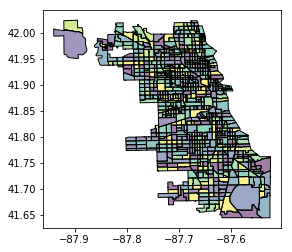

In [62]:
tracts.crs = {'init': 'epsg:4326'}
tracts.plot()

## Read in the grocery store data for Chicago

Note that you'll be reading in a **csv, not a shapefile**. This takes an extra conversion step to turn it into a GeoDataFrame - hopefully you have an easy cut-and-paste from last class!

Give it a name that makes sense, like `grocery_stores`.

In [10]:
gro_store = pd.read_csv('Grocery_Stores_-_2013.csv')

### Confirm that you have 506 rows

In [13]:
gro_store.shape

(506, 17)

### Plot to make sure it looks okay

In [16]:
gro_store.head()

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)"
1,3600 COMMISSARY,24279.0,9830.0,3800.0,B,3600 N LAKE SHORE DR,60613,LAKE VIEW,6,46,17031060900,1.703106e+14,1.171866e+06,1.924645e+06,41.948684,-87.643650,"(41.9486836744, -87.6436497585)"
2,4343 PETES FRESH MARKET,1336669.0,260303.0,57000.0,A,4343 S PULASKI RD,60632,ARCHER HEIGHTS,57,14,17031570100,1.703157e+14,1.150448e+06,1.875370e+06,41.813914,-87.723665,"(41.8139143113, -87.7236649419)"
3,4700 PETE'S FRESH MARKET,1243125.0,245519.0,45000.0,A,4700 S KEDZIE AVE,60632,BRIGHTON PARK,58,14,17031842800,1.703184e+14,1.155792e+06,1.873271e+06,41.808047,-87.704119,"(41.8080472717, -87.7041188223)"
4,5659 W. DIVERSEY,1575023.0,277375.0,4000.0,B,5659 W DIVERSEY AVE,60639,BELMONT CRAGIN,19,30,17031190602,1.703119e+14,1.137914e+06,1.918002e+06,41.931135,-87.768612,"(41.9311354035, -87.7686121306)"


In [35]:
points = gro_store.apply(lambda row: Point(row.LONGITUDE, row.LATITUDE), axis=1)
gro_store_map = gpd.GeoDataFrame(gro_store, geometry=points)
gro_store_map.crs = {'init': 'epsg:4326'}

In [31]:
gro_store_map

,STORE NAME,LICENSE ID,ACCOUNT NUMBER,SQUARE FEET,BUFFER SIZE,ADDRESS,ZIP CODE,COMMUNITY AREA NAME,COMMUNITY AREA,WARD,CENSUS TRACT,CENSUS BLOCK,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,geometry
0,200 LIQUORS,48663.0,17055.0,5000.0,B,204 E 47TH ST,60653,GRAND BOULEVARD,38,3,17031381500,1.703138e+14,1.178462e+06,1.873949e+06,41.809424,-87.620952,"(41.8094238941, -87.6209518020)",POINT (-87.62095180200001 41.8094238941)
1,3600 COMMISSARY,24279.0,9830.0,3800.0,B,3600 N LAKE SHORE DR,60613,LAKE VIEW,6,46,17031060900,1.703106e+14,1.171866e+06,1.924645e+06,41.948684,-87.643650,"(41.9486836744, -87.6436497585)",POINT (-87.6436497585 41.9486836744)
2,4343 PETES FRESH MARKET,1336669.0,260303.0,57000.0,A,4343 S PULASKI RD,60632,ARCHER HEIGHTS,57,14,17031570100,1.703157e+14,1.150448e+06,1.875370e+06,41.813914,-87.723665,"(41.8139143113, -87.7236649419)",POINT (-87.72366494190001 41.8139143113)
3,4700 PETE'S FRESH MARKET,1243125.0,245519.0,45000.0,A,4700 S KEDZIE AVE,60632,BRIGHTON PARK,58,14,17031842800,1.703184e+14,1.155792e+06,1.873271e+06,41.808047,-87.704119,"(41.8080472717, -87.7041188223)",POINT (-87.70411882229999 41.8080472717)
4,5659 W. DIVERSEY,1575023.0,277375.0,4000.0,B,5659 W DIVERSEY AVE,60639,BELMONT CRAGIN,19,30,17031190602,1.703119e+14,1.137914e+06,1.918002e+06,41.931135,-87.768612,"(41.9311354035, -87.7686121306)",POINT (-87.76861213059999 41.9311354035)
5,"7400 S HALSTED FOOD AND LIQUORS, INC.",980.0,186.0,10001.0,A,7400 S HALSTED ST,60621,ENGLEWOOD,68,17,17031681300,1.703168e+14,1.172209e+06,1.855769e+06,41.759675,-87.644420,"(41.7596745819, -87.6444202389)",POINT (-87.6444202389 41.7596745819)
6,79 FOOD BASKET,1958784.0,341069.0,3000.0,B,1351 W 79TH ST,60620,AUBURN GRESHAM,71,21,17031710700,1.703171e+14,1.168479e+06,1.852331e+06,41.750321,-87.658189,"(41.7503211206, -87.6581890529)",POINT (-87.65818905290001 41.7503211206)
7,A & B FOOD MARKET INC,43181.0,6483.0,10001.0,A,5057 W DIVISION ST,60651,AUSTIN,25,37,17031251100,1.703125e+14,1.142184e+06,1.907473e+06,41.902166,-87.753182,"(41.9021664421, -87.7531823487)",POINT (-87.75318234870001 41.9021664421)
8,A & G LIQUORS,44373.0,35423.0,4800.0,B,6945 S STATE ST,60637,GREATER GRAND CROSSING,69,6,17031690400,1.703169e+14,1.177547e+06,1.858785e+06,41.767831,-87.624766,"(41.7678312792, -87.6247659397)",POINT (-87.6247659397 41.7678312792)
9,A & R FOOD MART,9125.0,4227.0,2500.0,B,5952 W GRAND AVE,60639,BELMONT CRAGIN,19,37,17031191302,1.703119e+14,1.136148e+06,1.914150e+06,41.920596,-87.775193,"(41.9205964582, -87.7751926809)",POINT (-87.77519268090001 41.9205964582)


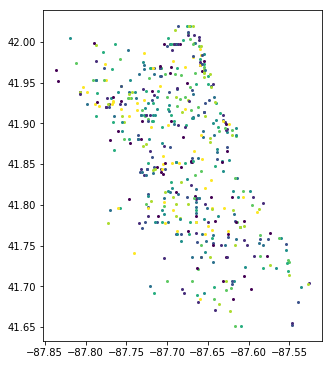

In [36]:
gro_store_map.plot(figsize = (5,20))

## Plot the grocery stores on top of the census tracts.

- Make it look somewhat nice, with a nice grey background and grocery stores that stand out.
- Be sure the CRSes are the same!

(-87.96107629997519, -87.50283170000732, 41.62530410001137, 42.042905899965575)

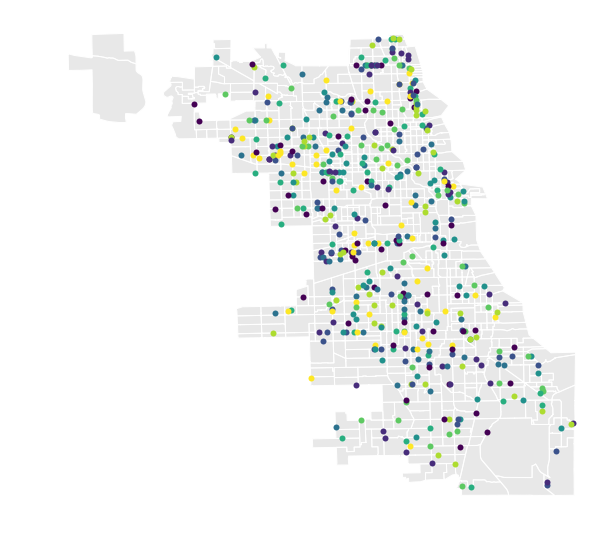

In [45]:
ax = tracts.plot(figsize = (10,25), color='lightgrey', edgecolor='white')
gro_store_map.plot(markersize=6, markeredgewidth=0, ax = ax)
ax.axis('off')

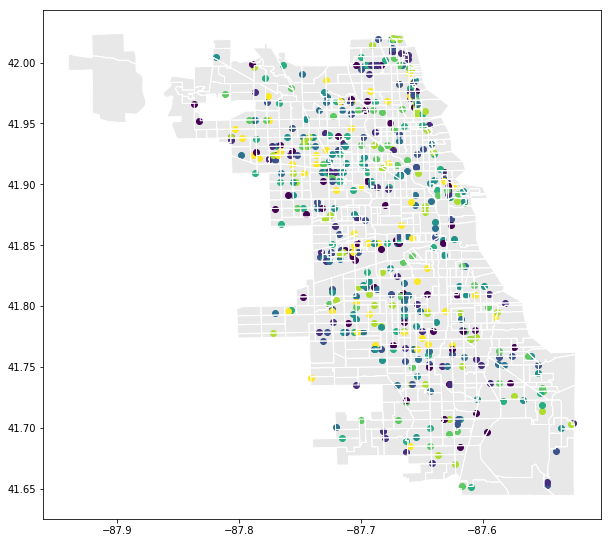

In [38]:
ax = gro_store_map.plot(markersize=6, figsize = (10,25))
tracts.plot(color='lightgrey', edgecolor='white', ax = ax)

## Which census tracts don't have a grocery store?

Just in case you forgot, `~` means "does NOT" in pandas. So for example, you might think the following code means **"plot all of the tracts that do NOT contain a grocery store"**.

```pyhon
tracts[~tracts.contains(grocery_stores)].plot()
```

Try it. It doesn't work.

In [50]:
~tracts.contains(gro_store_map)

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29     False
       ...  
771     True
772     True
773     True
774     True
775     True
776     True
777     True
778     True
779     True
780     True
781     True
782     True
783     True
784     True
785     True
786     True
787     True
788     True
789     True
790     True
791     True
792     True
793     True
794     True
795     True
796     True
797     True
798     True
799     True
800     True
Length: 801, dtype: bool

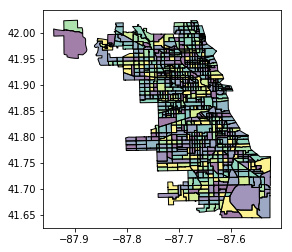

In [63]:
tracts[~tracts.contains(gro_store_map)].plot()

It actually means **"plot all of the tracts that do not contain *every* grocery store"**. Since no census tract contains every grocery store, it won't work.

## Geographic relationships

There are [a lot of other spatial relationships](http://geopandas.org/reference.html), such as:


* **contains:** 包含 is TOTALLLY INSIDE of the other object (boundaries can't touch)  -- a subset of intersects, "a neighborhood contains a restaurant"
* **intersects:** is OVERLAPPING at allm unless it's just boundary touching
* **touches:** only the boundary touches, like a tangent
* **within:** is TOTALLY INSIDE of the other object "a restaurant is WITHIN a neighborhood"
* **disjoint:** no touching!! no interescting
* **crosses:** goes through but isn't inside -- "a river crossing through a city"



Documentation Version:

* **contains:** each object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all
* **intersects:** the boundary and interior of each object intersects in any way with those of the other
* **touches:** if the objects have at least one point in common and their interiors do not intersect with any part of the other
* **within:** if each object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior)
* **disjoint:** the boundary and interior of each object does not intersect at all with those of the other
* **crosses:** the interior of each object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.





### Plot the census tracts that do not contain ANY grocery stores

In [53]:
tracts.disjoint(gro_store_map).head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

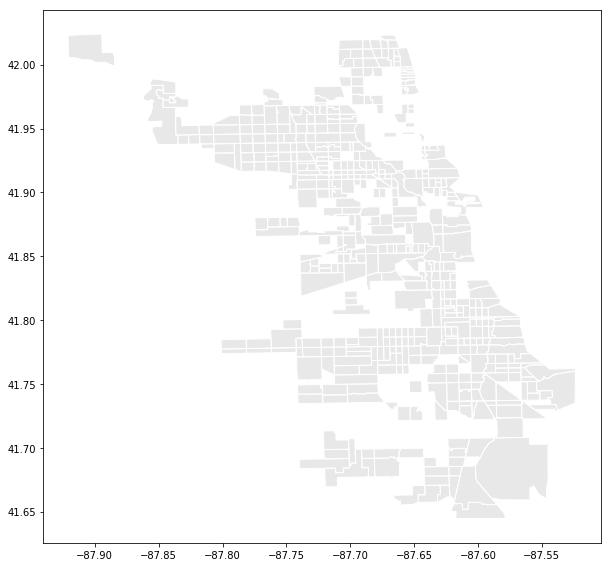

In [64]:
tracts[tracts.disjoint(gro_store_map)].plot(figsize = (10,30), color='lightgrey', edgecolor='white')

**But wait: that's not what we're doing!** We're interested in (kind of) people who are **half a mile** from a grocery store.

## Which census tracts are far from a grocery store? Introducing buffer!

`.buffer()` draws a buffer around a point, line, or shape. You can use it to say, "show me things within XXX distance of YYY". Try to take the grocery stores, draw a half-mile buffer around them, and plot it.

**It won't look pretty.**

In [66]:
# index are in degrees now
gro_store_map.crs

{'init': 'epsg:4326'}

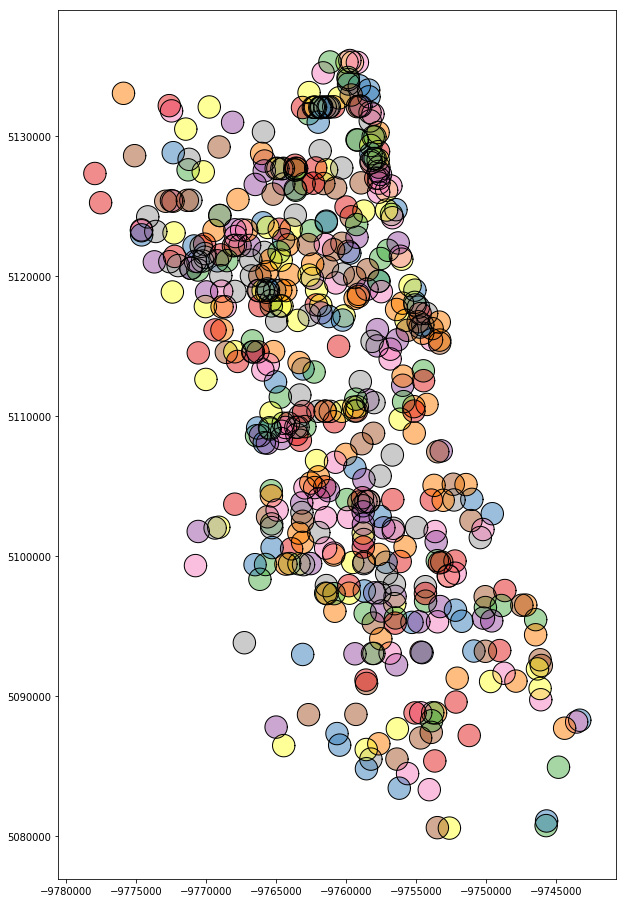

In [100]:
# change crs to Marceter
gro_store_map.to_crs(epsg=3395).buffer(800).plot(figsize=(10,30))

In [101]:
# alterantive: 
tracts = tracts.to_crs({'proj':'merc'})
gro_store_map = gro_store_map.to_crs({'proj':'merc'})
#tracts = tracts.to_crs(epsg=3395)

## Reprojecting to be able to use meters

Luckily we can use Mercator, the projection we should all dislike because it looks so ugly, to get units of meters.

You can use the epsg of `3395` if you'd like, or use `{'proj': 'merc'}` - either one is fine.

**How many meters is half a mile?**

- Reproject grocery stores to be Mercator (permanently)
- Create a half-mile buffer, 
- and map it.

## That... doesn't work.

Unfortunately `.buffer` uses the units of the current CRS, and the current CRS is **EPSG:4326**. What units is it using? You'll need to ask Google.

## Finding our food deserts

First, make a map of **every census tract** and **every grocery store**, along with a **buffer zone** around the grocery stores. You'll need to make sure they're in the **same projection**, and you might want to save the buffer to a new variable (`buffered_grocery_stores`, maybe?). You'll also probably want the buffer zone to be plotted with `alpha=0.5` or something like that to make it a bit transparent.

Actually, just **permanently reproject `tracts` to be Mercator**.

(-9791782.2233415227,
 -9740770.667814333,
 5076617.0114913741,
 5138777.0721363612)

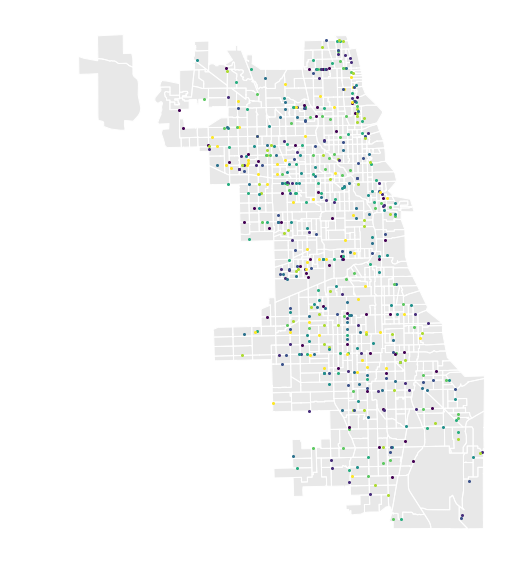

In [102]:
ax = tracts.plot(figsize=(8,20), color='lightgrey', edgecolor='white')
gro_store_map.plot(ax=ax)
ax.axis('off')

In [105]:
# create a geometry column
buff_gro_store_map = gro_store_map.buffer(800)
buff_gro_store_map.head()

0    POLYGON ((-9753119.737420607 5103981.778572024...
1    POLYGON ((-9755646.462380236 5124725.204320104...
2    POLYGON ((-9764553.711852053 5104649.938418441...
3    POLYGON ((-9762377.847771194 5103776.950972501...
4    POLYGON ((-9769557.210010724 5122108.793547577...
dtype: object

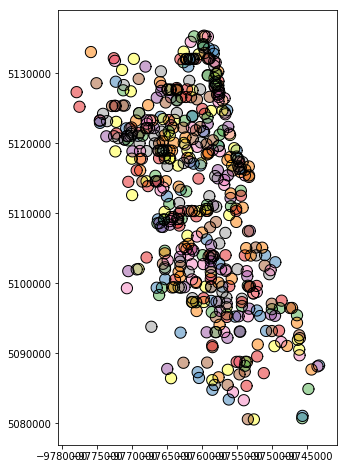

In [111]:
buff_gro_store_map.plot(figsize=(5,20))

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.6507532941,
 5139015.6476360438)

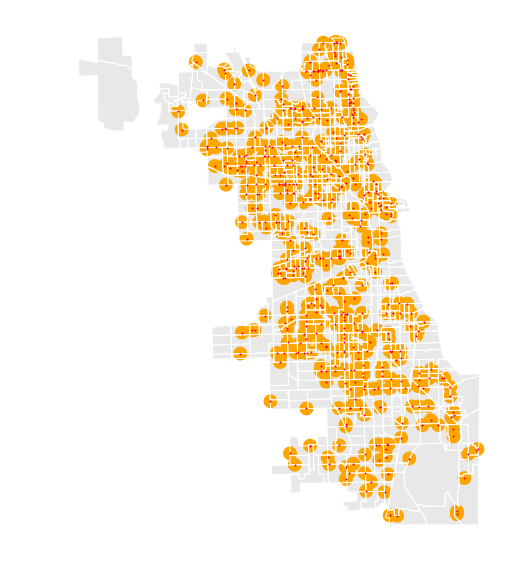

In [119]:
ax = tracts.plot(figsize=(8,20), color='lightgrey', edgecolor='white')
buff_gro_store_map.plot(ax=ax, color='orange', linewidth=0, alpha=1)
gro_store_map.plot(ax=ax, color='red', markeredgewidth=0)

ax.axis('off')

(-9791810.8051522169,
 -9740170.4497897606,
 5076605.6507532941,
 5139015.6476360438)

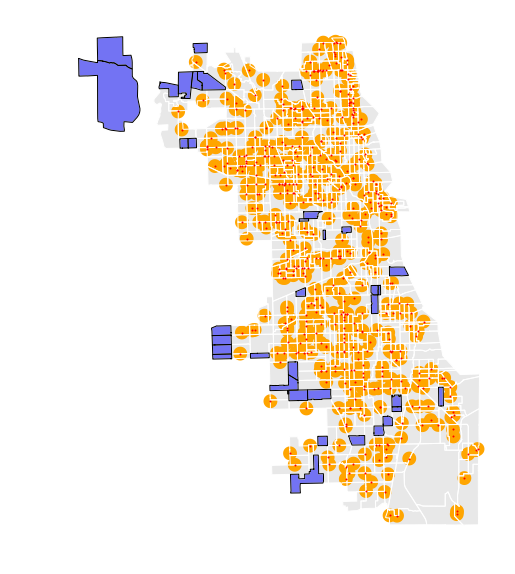

In [141]:
ax = tracts.plot(figsize=(8,20), color='lightgrey', edgecolor='white')
buff_gro_store_map.plot(ax=ax, color='orange', linewidth=0, alpha=1)
gro_store_map.plot(ax=ax, color='red', markeredgewidth=0)

# tracts[tracts.disjoint(buff_gro_store_map)].plot(ax=ax, color='green')
# too many comparisions

tracts[tracts.disjoint(buff_gro_store_map.unary_union)].plot(ax=ax, color='blue')

ax.axis('off')

## Now add to that the census tracts that do NOT touch one of our buffers.

It... doesn't seem to look right, once again.

## The sad way of doing it

If you want to do this right, we need to do it **one tract at a time**, and say "hey, do you intersect with any buffers?"

First, let's pull out a single tract.

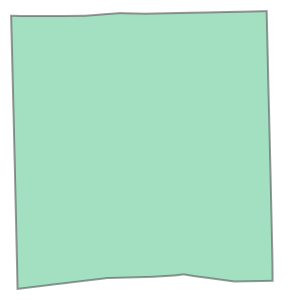

In [121]:
tract = tracts.loc[99]
tract.geometry

In [122]:
tract

commarea                                                      8
commarea_n                                                    8
countyfp10                                                  031
geoid10                                             17031080201
geometry      POLYGON ((-9755101.638494743 5118635.723091501...
name10                                                   802.01
namelsad10                                  Census Tract 802.01
notes                                                          
statefp10                                                    17
tractce10                                                080201
Name: 99, dtype: object

In [125]:
type(tract.geometry)

shapely.geometry.polygon.Polygon

Then, ask it which grocery store buffers it interacts with. **I'm using `.head()` so I don't have to see a big long list**.

In [126]:
# Do you interact with any other geometry
buff_gro_store_map.intersects(tract.geometry).value_counts()

False    502
True       4
dtype: int64

Instead of a big long list of `True` and `False` for every single comparison, I can say **"hey, were any of those True?"**

In [127]:
# .any() is any of it is true
# take one geometry, comparing it to every gerocery store buffer
buff_gro_store_map.intersects(tract.geometry).any()

True

### Using .intersects and .any() with a .apply

So now we get to the real ugly part: go through every single tract, see if it intersects, and map accordingly.

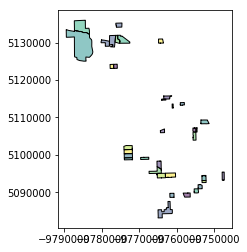

In [129]:
# returns YES if the row intersects with ANY of the grocery stores
def does_intersect(row):
    return buff_gro_store_map.intersects(row.geometry).any()

# Go through every row, testing for an intersection
# notice the ~ to make it negative
food_des = tracts[~tracts.apply(does_intersect, axis=1)]
food_des.plot()

## Stop crying, please: we can fix this with `.unary_union`

The problem right now is that we're comparing **every single tract** to **every single buffer**. But what if there was only **one buffer** instead of a few hundred?

In [132]:
buff_gro_store_map.shape

(506,)

In [ ]:
# combined all buffers into one gigant group

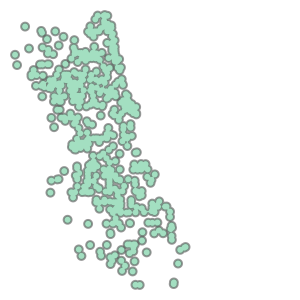

In [133]:
buff_gro_store_map.unary_union

In [135]:
type(buff_gro_store_map.unary_union)

shapely.geometry.multipolygon.MultiPolygon

Look at that!!!! **`.unary_union`** takes a bunch of polygons or whatever and turns them into ONE NICE SIMPLE POYLGON.

And we can use that with our `.intersects` now, really super easily.

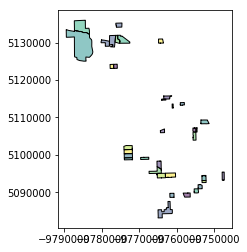

In [134]:
tracts[~tracts.intersects(buff_gro_store_map.unary_union)].plot()

In [138]:
tracts.disjoint(buff_gro_store_map.unary_union).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

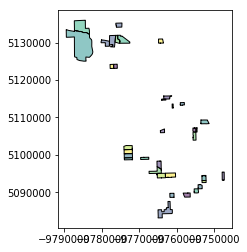

In [136]:
tracts[tracts.disjoint(buff_gro_store_map.unary_union)].plot()

## Plot that on top of the map you made before, with all of the circles

You'll want to do it AFTER you plot all of the tracts but BEFORE you plot the grocery stores.

## Okay actually though I have bad news

Usually when you do these comparisons, you aren't saying "does ANY part of this census tract touch a buffer zone," you're saying "does the CENTER of this census tract touch a buffer zone?"

**How do we find the center of the census tracts?** It isn't terrible, really.

## Getting the center of the census tracts

The important thing is that they aren't called centers, they're called **centroids**.

And you find them by just typing....... `centroid`.

In [150]:
tracts.centroid.head()

0    POINT (-9754931.488121597 5094025.722640704)
1    POINT (-9760702.447700255 5107355.596141533)
2    POINT (-9755494.456942633 5110170.881676493)
3    POINT (-9760864.979118478 5110849.228339689)
4     POINT (-9759945.189688142 5113061.21758626)
dtype: object

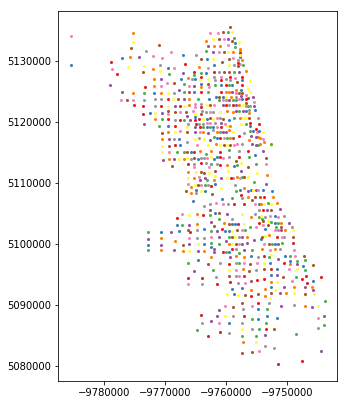

In [145]:
tracts.centroid.plot(figsize = (5,20))

## Which centroids aren't inside of a buffer?

Well, we do the exact same as before, but we ask something like "which centroids are NOT within the grocery store buffer zone?", and then we feed that right back to `tracts`.

In [155]:
# don't do MANY to MANY comparisions
# do MANY to ONE comparisions
tracts.centroid.within(buff_gro_store_map.unary_union)

0      False
1       True
2       True
3       True
4      False
5       True
6      False
7      False
8      False
9      False
10     False
11      True
12      True
13      True
14      True
15     False
16      True
17      True
18      True
19      True
20     False
21      True
22      True
23      True
24     False
25      True
26     False
27      True
28      True
29      True
       ...  
771     True
772    False
773     True
774    False
775     True
776     True
777     True
778     True
779     True
780    False
781    False
782    False
783     True
784    False
785     True
786    False
787     True
788     True
789     True
790     True
791     True
792     True
793     True
794     True
795    False
796     True
797    False
798    False
799     True
800     True
Length: 801, dtype: bool

In [156]:
~tracts.centroid.within(buff_gro_store_map.unary_union)

0       True
1      False
2      False
3      False
4       True
5      False
6       True
7       True
8       True
9       True
10      True
11     False
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20      True
21     False
22     False
23     False
24      True
25     False
26      True
27     False
28     False
29     False
       ...  
771    False
772     True
773    False
774     True
775    False
776    False
777    False
778    False
779    False
780     True
781     True
782     True
783    False
784     True
785    False
786     True
787    False
788    False
789    False
790    False
791    False
792    False
793    False
794    False
795     True
796    False
797     True
798     True
799    False
800    False
Length: 801, dtype: bool

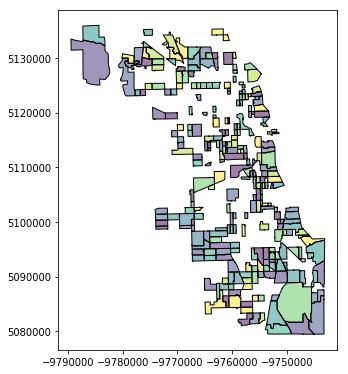

In [162]:
tracts[~tracts.centroid.within(buff_gro_store_map.unary_union)].plot(figsize=(5,20))

In [160]:
tracts[~tracts.centroid.within(buff_gro_store_map.unary_union)]

,commarea,commarea_n,countyfp10,geoid10,geometry,name10,namelsad10,notes,statefp10,tractce10
0,44,44.0,031,17031842400,POLYGON ((-9754264.404603189 5092203.790407223...,8424,Census Tract 8424,,17,842400
4,28,28.0,031,17031838200,POLYGON ((-9759137.081353614 5113622.448989131...,8382,Census Tract 8382,,17,838200
6,53,53.0,031,17031530503,POLYGON ((-9756470.311632894 5082251.334041871...,5305.03,Census Tract 5305.03,,17,530503
7,76,76.0,031,17031760803,POLYGON ((-9778130.635519065 5127934.234250952...,7608.03,Census Tract 7608.03,,17,760803
8,54,54.0,031,17031540102,POLYGON ((-9753686.099848988 5081242.962023797...,5401.02,Census Tract 5401.02,,17,540102
9,54,54.0,031,17031540101,POLYGON ((-9753693.224295935 5081240.438634531...,5401.01,Census Tract 5401.01,,17,540101
10,44,44.0,031,17031440201,"POLYGON ((-9752962.18920397 5094501.675737058,...",4402.01,Census Tract 4402.01,,17,440201
15,29,29.0,031,17031843300,POLYGON ((-9761407.665008917 5111411.345570015...,8433,Census Tract 8433,,17,843300
20,67,67.0,031,17031834900,POLYGON ((-9757649.519000923 5099301.819981429...,8349,Census Tract 8349,,17,834900
24,35,35.0,031,17031842000,"POLYGON ((-9754821.66997364 5108275.256741142,...",8420,Census Tract 8420,,17,842000


(-9791810.8051522169,
 -9740170.4497897606,
 5076605.6507532941,
 5139015.6476360438)

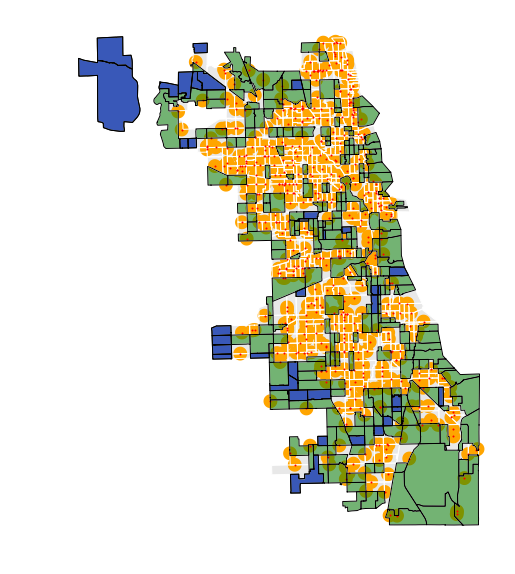

In [164]:
ax = tracts.plot(figsize=(8,20), color='lightgrey', edgecolor='white')
buff_gro_store_map.plot(ax=ax, color='orange', linewidth=0, alpha=1)
gro_store_map.plot(ax=ax, color='red', markeredgewidth=0)

# tracts[tracts.disjoint(buff_gro_store_map)].plot(ax=ax, color='green')
# too many comparisions

# the center of tracts are not contained with grocery store buffer
tracts[~tracts.centroid.within(buff_gro_store_map.unary_union)].plot(ax=ax, color='green') 

#tracts do not have a grocery store (buffer)
tracts[tracts.disjoint(buff_gro_store_map.unary_union)].plot(ax=ax, color='blue')

ax.axis('off')

## And then we just map it all over again

## And if we want to get technical and make your brain hurt more

There are two kinds of grocery stores, A and B, and B should have a half-mile radius and A should have a one-mile radius.

In [ ]:
def make_fancy_buffer(row):
    if row['BUFFER SIZE'] == 'A':
        return row.geometry.buffer(1600)
    elif row['BUFFER SIZE'] == 'B':
        return row.geometry.buffer(800)
    
fancy_buffer = grocery_stores.apply(make_fancy_buffer, axis=1)

# We need to convert it into a GeoSeries because pandas thinks its a normal series
fancy_buffer = gpd.GeoSeries(fancy_buffer)

### Make the many-layered map again, but this time use `fancy_buffer` instead of `grocery_stores_buffer`